In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [106]:
data1 = pd.read_csv('stories_sport.csv')


In [107]:
data2 = pd.read_csv('stories_tamazight.csv')


In [108]:
data3 = pd.read_csv('stories_medias.csv')


In [109]:
data4 = pd.read_csv('stories_societe.csv')


In [110]:
data5 = pd.read_csv('stories_marocains-du-monde.csv')

In [111]:
data6 = pd.read_csv('stories_regions.csv')

In [112]:
data7 = pd.read_csv('stories_politique.csv')

In [113]:
data8 = pd.read_csv('stories_orbites.csv')

In [114]:
data9= pd.read_csv('stories_faits-divers.csv')

In [115]:
data10 = pd.read_csv('stories_economie.csv')

In [116]:
data11 = pd.read_csv('stories_art-et-culture.csv')

In [117]:
# Merge the dataframes based on common rows
merged_df = pd.concat([data1, data2 ,data3 ,data4 ,data5 , data6 ,data7, data8 , data9 , data10 ,data11])
print(merged_df)

     Unnamed: 0                                id  \
0             0  ad7f145a055c11ebbc5e646e69d991ea   
1             1  ae3e012c055c11ebb26e646e69d991ea   
2             2  af1ce6ec055c11eb9fcc646e69d991ea   
3             3  afffccd4055c11eb9d42646e69d991ea   
4             4  b0e1a962055c11ebb4fd646e69d991ea   
..          ...                               ...   
995         995  97e7b078055311eb972a646e69d991ea   
996         996  98f7723e055311ebb811646e69d991ea   
997         997  9a29bc06055311ebbb05646e69d991ea   
998         998  9b547968055311ebb870646e69d991ea   
999         999  9c6b8f50055311eb9c5c646e69d991ea   

                                                 title  \
0        3 أندية تشعل المنافسة على درع البطولة الوطنية   
1          لامبارد يؤكد غياب زياش مجددا عن نادي تشيلسي   
2        إعفاء البرتغالي "أروزو" من تدريب منتخب الشبان   
3       "فيفا" يجري تعديلات على قواعد استدعاء اللاعبين   
4       الجامعة الملكية للكراطي تقرر دعم جمعيات رياضية   
..             

In [118]:
df = pd.DataFrame(merged_df)
df

,Unnamed: 0,id,title,date,author,story,topic
0,0,ad7f145a055c11ebbc5e646e69d991ea,3 أندية تشعل المنافسة على درع البطولة الوطنية,السبت 03 أكتوبر 2020 - 07:50,هسبورت - آمال لكعيدا,رغم أن المستوى التقني العام لمباريات الدوري، م...,sport
1,1,ae3e012c055c11ebb26e646e69d991ea,لامبارد يؤكد غياب زياش مجددا عن نادي تشيلسي,السبت 03 أكتوبر 2020 - 02:30,هسبورت - حمزة اشتيوي,أكد فرانك لامبارد، مدرب نادي تشيلسي الإنجليزي ...,sport
2,2,af1ce6ec055c11eb9fcc646e69d991ea,"إعفاء البرتغالي ""أروزو"" من تدريب منتخب الشبان",الجمعة 02 أكتوبر 2020 - 20:20,هسبريس من الرباط,وافقت الإدارة التقنية التابعة للجامعة الملكية ...,sport
3,3,afffccd4055c11eb9d42646e69d991ea,"""فيفا"" يجري تعديلات على قواعد استدعاء اللاعبين",الجمعة 02 أكتوبر 2020 - 17:47,هسبريس - د.ب.أ,أعلن الاتحاد الدولي لكرة القدم (فيفا) في وقت م...,sport
4,4,b0e1a962055c11ebb4fd646e69d991ea,الجامعة الملكية للكراطي تقرر دعم جمعيات رياضية,الجمعة 02 أكتوبر 2020 - 01:41,ياسين أوشن,"قررت ""الجامعة الملكية المغربية للكراطي وأساليب...",sport
...,...,...,...,...,...,...,...
995,995,97e7b078055311eb972a646e69d991ea,مِهَنيّون: غياب توقيع رئيس الحكومة يوقف 200 مش...,الاثنين 18 نونبر 2019 - 00:25,هسبريس - وائل بورشاشن,تستمرّ الآثار الجانبية للانتقال الحكومي الأخير...,art-et-culture
996,996,98f7723e055311ebb811646e69d991ea,"ندوة تقارب ""جهود السوسيين"" في خدمة العربية",الأحد 17 نونبر 2019 - 11:15,الحسين حرّان,"قال الدكتور المهدي السعيدي، في ندوة حول ""جهود ...",art-et-culture
997,997,9a29bc06055311ebbb05646e69d991ea,تتويج أشرطة في مهرجان سينما الذاكرة المشتركة,السبت 16 نونبر 2019 - 20:17,هسبريس من الرباط,أجمعت لجنة المسابقة الخاصة بالأفلام المغربية ا...,art-et-culture
998,998,9b547968055311ebb870646e69d991ea,ريشة التشكيلية بثينة أزمي تتمرد على الظلم والع...,السبت 16 نونبر 2019 - 10:00,هسبريس - كاميليا كريم,ألوان حيّة ولمسات تعبيرية تحْمل مآسي إنسانية ل...,art-et-culture


In [119]:
print(df.head())

   Unnamed: 0                                id  \
0           0  ad7f145a055c11ebbc5e646e69d991ea   
1           1  ae3e012c055c11ebb26e646e69d991ea   
2           2  af1ce6ec055c11eb9fcc646e69d991ea   
3           3  afffccd4055c11eb9d42646e69d991ea   
4           4  b0e1a962055c11ebb4fd646e69d991ea   

                                            title  \
0   3 أندية تشعل المنافسة على درع البطولة الوطنية   
1     لامبارد يؤكد غياب زياش مجددا عن نادي تشيلسي   
2   إعفاء البرتغالي "أروزو" من تدريب منتخب الشبان   
3  "فيفا" يجري تعديلات على قواعد استدعاء اللاعبين   
4  الجامعة الملكية للكراطي تقرر دعم جمعيات رياضية   

                            date                author  \
0   السبت 03 أكتوبر 2020 - 07:50  هسبورت - آمال لكعيدا   
1   السبت 03 أكتوبر 2020 - 02:30  هسبورت - حمزة اشتيوي   
2  الجمعة 02 أكتوبر 2020 - 20:20      هسبريس من الرباط   
3  الجمعة 02 أكتوبر 2020 - 17:47        هسبريس - د.ب.أ   
4  الجمعة 02 أكتوبر 2020 - 01:41            ياسين أوشن   

                         

In [120]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11000 non-null  int64 
 1   id          11000 non-null  object
 2   title       11000 non-null  object
 3   date        11000 non-null  object
 4   author      11000 non-null  object
 5   story       11000 non-null  object
 6   topic       11000 non-null  object
dtypes: int64(1), object(6)
memory usage: 687.5+ KB
None


In [121]:
print(df.describe())

         Unnamed: 0
count  11000.000000
mean     499.500000
std      288.688113
min        0.000000
25%      249.750000
50%      499.500000
75%      749.250000
max      999.000000


In [122]:
print(df.shape) 

(11000, 7)


In [123]:
corr=df.corr()
corr

,Unnamed: 0
Unnamed: 0,1.0


In [124]:
df.dropna(inplace=True)
df

,Unnamed: 0,id,title,date,author,story,topic
0,0,ad7f145a055c11ebbc5e646e69d991ea,3 أندية تشعل المنافسة على درع البطولة الوطنية,السبت 03 أكتوبر 2020 - 07:50,هسبورت - آمال لكعيدا,رغم أن المستوى التقني العام لمباريات الدوري، م...,sport
1,1,ae3e012c055c11ebb26e646e69d991ea,لامبارد يؤكد غياب زياش مجددا عن نادي تشيلسي,السبت 03 أكتوبر 2020 - 02:30,هسبورت - حمزة اشتيوي,أكد فرانك لامبارد، مدرب نادي تشيلسي الإنجليزي ...,sport
2,2,af1ce6ec055c11eb9fcc646e69d991ea,"إعفاء البرتغالي ""أروزو"" من تدريب منتخب الشبان",الجمعة 02 أكتوبر 2020 - 20:20,هسبريس من الرباط,وافقت الإدارة التقنية التابعة للجامعة الملكية ...,sport
3,3,afffccd4055c11eb9d42646e69d991ea,"""فيفا"" يجري تعديلات على قواعد استدعاء اللاعبين",الجمعة 02 أكتوبر 2020 - 17:47,هسبريس - د.ب.أ,أعلن الاتحاد الدولي لكرة القدم (فيفا) في وقت م...,sport
4,4,b0e1a962055c11ebb4fd646e69d991ea,الجامعة الملكية للكراطي تقرر دعم جمعيات رياضية,الجمعة 02 أكتوبر 2020 - 01:41,ياسين أوشن,"قررت ""الجامعة الملكية المغربية للكراطي وأساليب...",sport
...,...,...,...,...,...,...,...
995,995,97e7b078055311eb972a646e69d991ea,مِهَنيّون: غياب توقيع رئيس الحكومة يوقف 200 مش...,الاثنين 18 نونبر 2019 - 00:25,هسبريس - وائل بورشاشن,تستمرّ الآثار الجانبية للانتقال الحكومي الأخير...,art-et-culture
996,996,98f7723e055311ebb811646e69d991ea,"ندوة تقارب ""جهود السوسيين"" في خدمة العربية",الأحد 17 نونبر 2019 - 11:15,الحسين حرّان,"قال الدكتور المهدي السعيدي، في ندوة حول ""جهود ...",art-et-culture
997,997,9a29bc06055311ebbb05646e69d991ea,تتويج أشرطة في مهرجان سينما الذاكرة المشتركة,السبت 16 نونبر 2019 - 20:17,هسبريس من الرباط,أجمعت لجنة المسابقة الخاصة بالأفلام المغربية ا...,art-et-culture
998,998,9b547968055311ebb870646e69d991ea,ريشة التشكيلية بثينة أزمي تتمرد على الظلم والع...,السبت 16 نونبر 2019 - 10:00,هسبريس - كاميليا كريم,ألوان حيّة ولمسات تعبيرية تحْمل مآسي إنسانية ل...,art-et-culture


In [125]:
LabelEncoder
LE =LabelEncoder()
df[ 'id'] =LE.fit_transform(df[ 'id' ])
df[ 'id']

0      7448
1      7477
2      7520
3      7560
4      7601
       ... 
995    6507
996    6550
997    6600
998    6658
999    6697
Name: id, Length: 11000, dtype: int32

In [126]:
df[ 'title'] =LE.fit_transform(df[ 'title' ])
df[ 'title']

0       1412
1       8708
2       2099
3        919
4       2806
       ...  
995     9950
996    10032
997     5098
998     7195
999     9311
Name: title, Length: 11000, dtype: int32

In [127]:
df[ 'date'] =LE.fit_transform(df[ 'date' ])
df[ 'date']

0       9543
1       9542
2       6283
3       6276
4       6241
       ...  
995     3969
996      806
997    10253
998    10251
999    10250
Name: date, Length: 11000, dtype: int32

In [128]:
df[ 'author'] =LE.fit_transform(df[ 'author' ])
df[ 'author']

0      837
1      840
2      702
3      496
4      862
      ... 
995    591
996     77
997    702
998    535
999    702
Name: author, Length: 11000, dtype: int32

In [129]:
df[ 'story'] =LE.fit_transform(df[ 'story' ])
df[ 'story']

0       5403
1       1619
2      10045
3        827
4       8162
       ...  
995     3929
996     7249
997      255
998     1714
999     4208
Name: story, Length: 11000, dtype: int32

In [130]:
df[ 'topic']=LE.fit_transform(df[ 'topic' ])
df[ 'topic']


0      9
1      9
2      9
3      9
4      9
      ..
995    0
996    0
997    0
998    0
999    0
Name: topic, Length: 11000, dtype: int32

<AxesSubplot:>

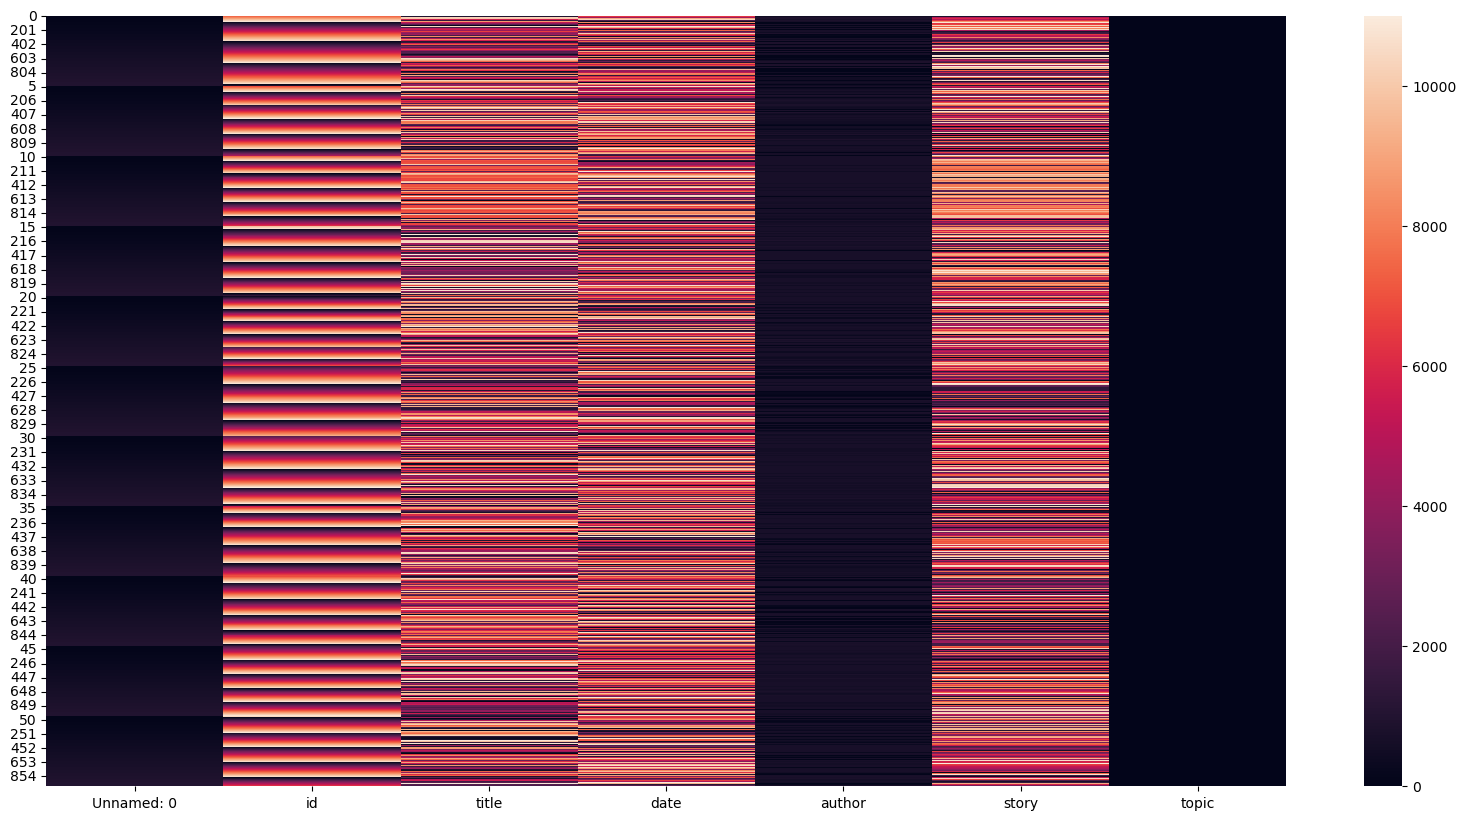

In [131]:
plt.figure(figsize=(20, 10))
sns.heatmap(df)

<AxesSubplot:>

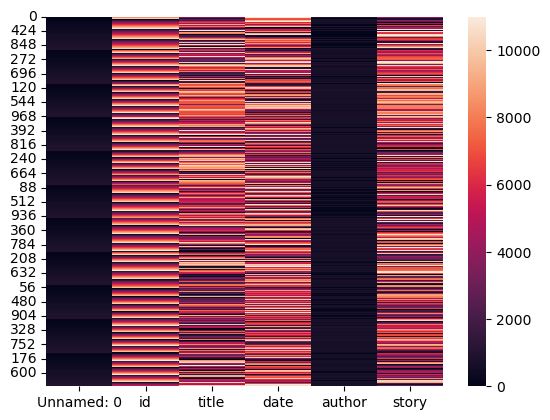

In [132]:
sns.heatmap(df.drop(['topic'], axis=1))

<AxesSubplot:>

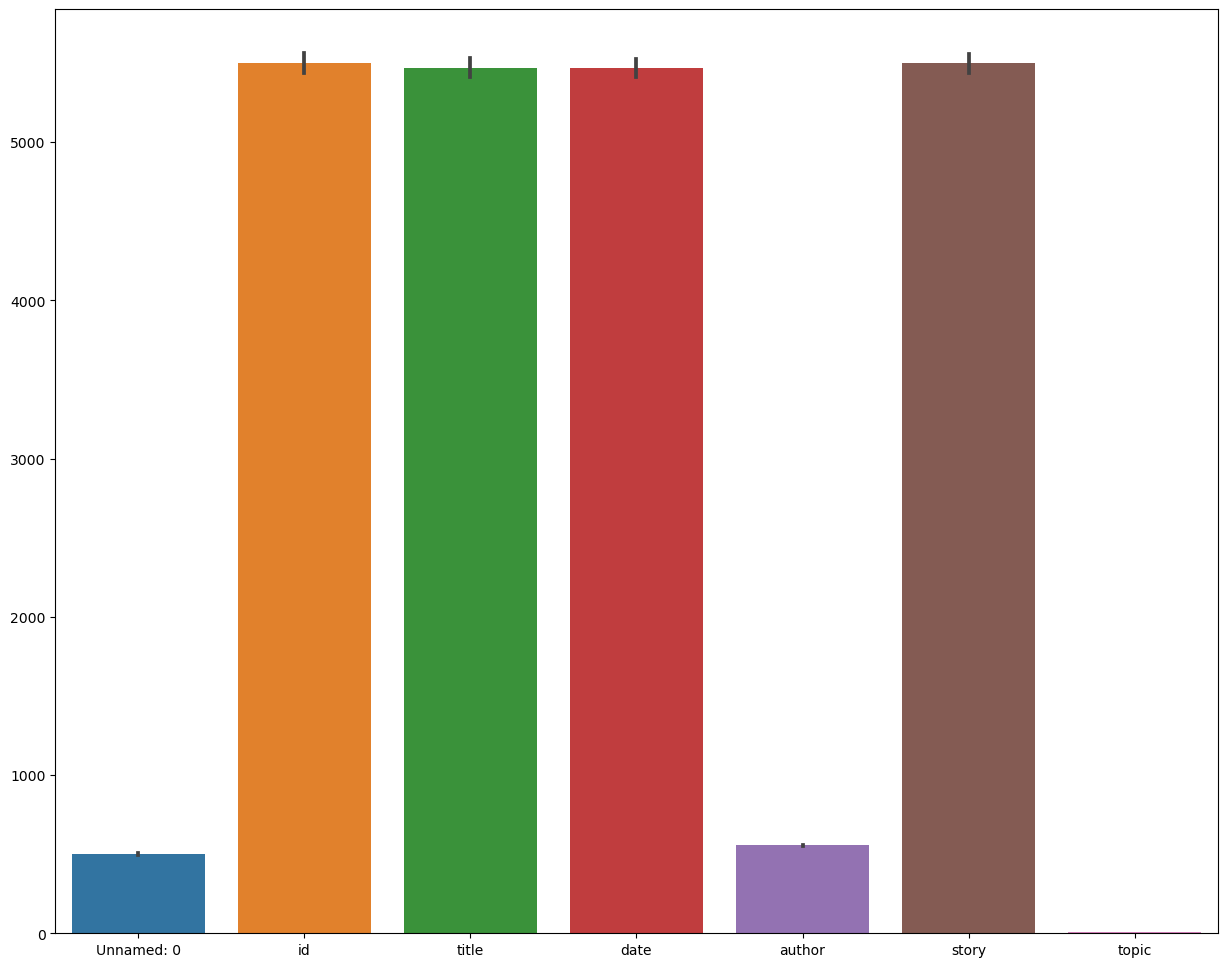

In [133]:
plt.figure(figsize=(15,12))
sns.barplot(data=df)

C:\Users\emana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='topic', ylabel='count'>

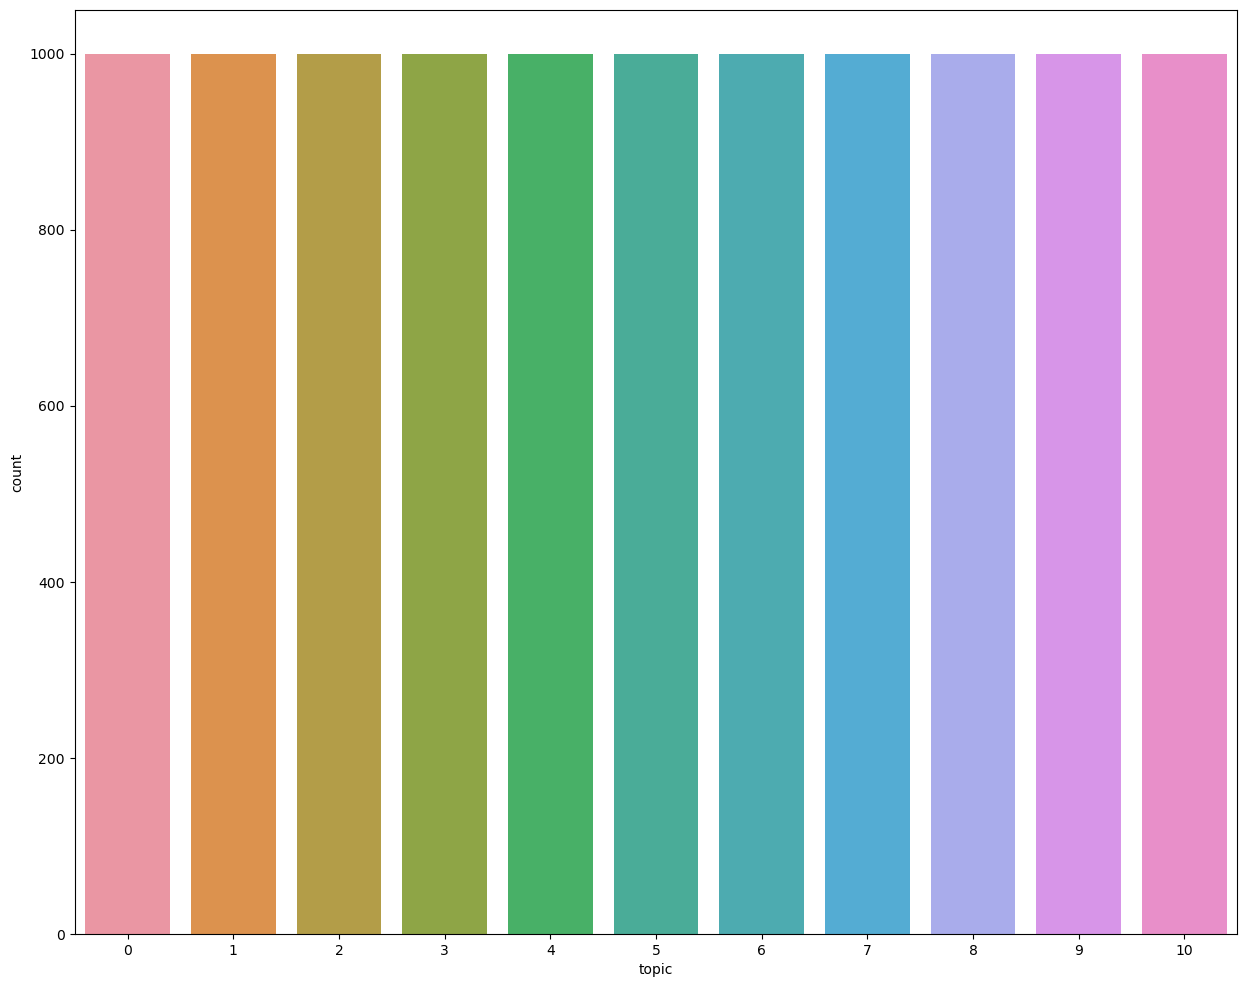

In [134]:
plt.figure(figsize=(15,12))
sns.countplot(df['topic'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2b1bc079af0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b1bc0690d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b1bc079940>,
 'medians': [<matplotlib.lines.Line2D at 0x2b1bc069670>,
 'fliers': [<matplotlib.lines.Line2D at 0x2b1bc069940>,
 'means': []}

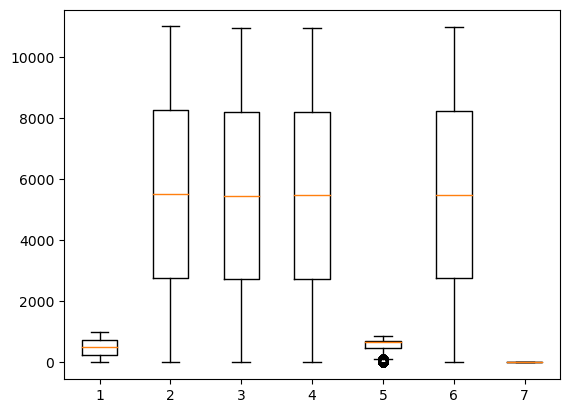

In [135]:
plt.boxplot(df)


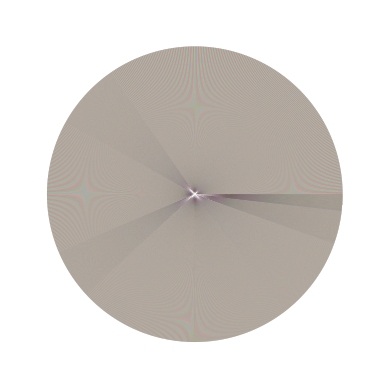

In [136]:
import numpy as np
df= np.array(df['topic'])
plt.pie(df)
plt.show()

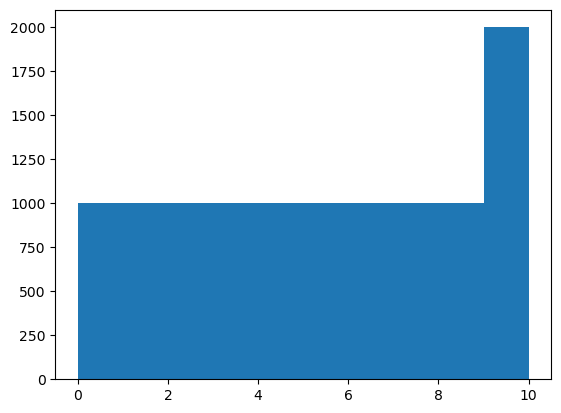

In [141]:
plt.hist(df)
plt.show()